# Visualize ECMWF data

This is an interactive page to view the World Meteorological Organization Homepage (WMO) Essential data based on (Hi resolution) HRES simulation done by the European Centre for Medium-Range Weather Forecasts (ECMWF). These data are available at the ECMWF website (http://www.ecmwf.int/en/forecasts/datasets/wmo-essential-based-hres) but also downloaded locally in the lab at \\139.191.1.18\h\ECMWH\bufr. 
Note that the resolution of the local data is 0.5 min while the data downloaded from the above url have 2.5 min resolution based on the same 0.5 resolution results.
The code below reads the local database and displays the data using as background the earth basemap. 

First let's import some necessary python modules

numpy for array manipulation
Ipython widgets for the interactive options
matplotlib for plotting
datetime for reading the time attribute of the data
Basemap for maps
pygrib for reading the grib files provided by ECMWF
glob for filtering out the needed files within the local folder
string for string manipulations

Finaly matplotlib inline is used to display the graph within the page, otherwise it creates a separate window.


In [6]:
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap, shiftgrid
import pygrib
import glob
import string

%matplotlib notebook

Below we define the basic function that controls the interactive options by passing the required data as arguments, namely year, month, day, hour of the corresponding data for visualization. These variables will be chosen by the menu widgets later. Note that the filename is constracted by the date info and msl refers to mean sea level pressure and u, v are the velocity components at 850hPa isobars. 

We define the range of the daily data provided. Here we have every 12 hours...

In [7]:
ht=[0,12]
ht=[w for w in map(str,ht )]


In order to view the figure at any angle we might need we need to pass as an option the basemap view origin and define the step for the lon,lat variation in the arguments of the interactive call. In addition for efficiency we split the algorithm into 2 separate functions one one for reading the data at a given date and the other for displaying the graphs

In [8]:
from getmedf import *

In [23]:
def viewdata(latc=60,lonc=-60):
    
    latc=np.float(latc)
    lonc=np.float(lonc)

    # make orthographic basemap.
    m = Basemap(resolution='c',projection='ortho',lat_0=latc,lon_0=lonc)
    # create figure, add axes
    fig1 = plt.figure(figsize=(8,10))
    ax = fig1.add_axes([0.1,0.1,0.8,0.8])
    # set desired contour levels.
    clevs = np.arange(960,1061,5)

    # compute native x,y coordinates of grid.
    x, y = m(lons, lats)
    # define parallels and meridians to draw.
    parallels = np.arange(-90.,90,20.)
    meridians = np.arange(0.,360.,20.)
    # plot SLP contours.
    CS1 = m.contour(x,y,slp,clevs,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(x,y,slp,clevs,cmap=plt.cm.RdBu_r,animated=True)
    # plot wind vectors on projection grid.
    # first, shift grid so it goes from -180 to 180 (instead of 0 to 360
    # in longitude).  Otherwise, interpolation is messed up.
    ugrid,newlons = shiftgrid(180.,u,longitudes,start=False)
    vgrid,newlons = shiftgrid(180.,v,longitudes,start=False)
    # transform vectors to projection grid.
    uproj,vproj,xx,yy = \
    m.transform_vector(ugrid,vgrid,newlons,latitudes,81,81,returnxy=True,masked=True)
    # now plot.
    Q = m.quiver(xx,yy,uproj,vproj,scale=700)
    # make quiver key.
    qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
    # draw coastlines, parallels, meridians.
    m.drawcoastlines(linewidth=1.5)
    m.drawparallels(parallels)
    m.drawmeridians(meridians)
    # add colorbar
  #  cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
 #   cb.set_label('hPa')
    # set plot title
  #  ax.set_title('SLP and Wind Vectors (850hPa) '+str(date))
    plt.show()

so now we call the first one for retriving the data. Note that this is not interactive so one has to set the values in the function arguments below.

In [14]:
tstamp='20160617.00'

In [15]:
date=datetime.datetime.strptime(tstamp,'%Y%m%d.%H')

In [10]:
ni,nj=81,81

In [31]:
lon0=-180.
lon1=180.
lat0=-90.
lat1=90.

In [32]:
[slp],[u],[v],lons,lats = wmap(date.year,date.month,date.day,0,0,3,lon0,lon1,lat0,lat1,ni,nj)


0
1
2


In [21]:
longitudes=lons[0,:]
latitudes=lats[:,0]

We define the widget values for the center of map

In [18]:
lonct=np.arange(0,360,10)
lonct=[w for w in map(str,lonct )]
latct=np.arange(-90,90,10)
latct=[w for w in map(str,latct )]


<IPython.core.display.Javascript object>


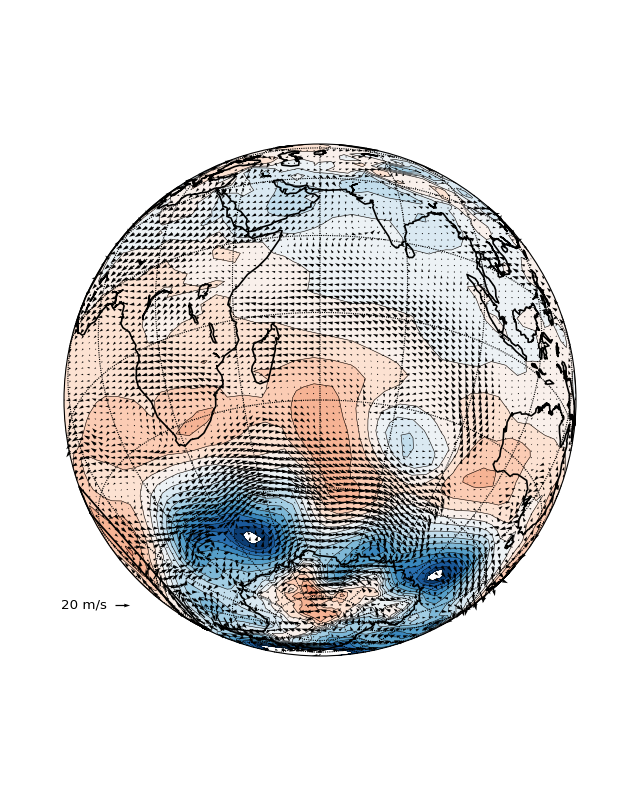

In [34]:
interact_manual(viewdata,latc=latct,lonc=lonct)

In [15]:
#viewdata(latc=30,lonc=180)